In [2]:
# WeatherPy

#### Note
# Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#Create variable for api key
api_key = weather_api_key

# Save config information.
#url = "http://api.openweathermap.org/data/2.5/weather?"

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
#units = "metric"

# Build partial query URL
#query_url = f"{url}appid={api_key}&q={city}&units={units}"




# Get weather data
weather_response = requests.get(url)
weather_json = weather_response.json()

# set up lists to hold reponse info
lat = []
lng = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
max_temp = []
wind_speed = []
country = []
city_name = []

#Initialize counters
counter = 1
sets = 0

#Start analyzing data
print('Beginning Data Retrieval')
print('-----------------------------')

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(f"{url}&q={city}").json() 
        #print(response)
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        city_named = response['name']
        #Include a print log of each city as it's being processed with the city number and city name.
        print(f"Now processing Record {counter} of Set {sets} | {city_named}")
    
        #Reset counter
        counter = counter + 1
        
        
        #Wait one second between API calls so you do not overload limit
        time.sleep(0.1)
        count = 1 
        sets = sets + 1
        
    except:
        print("City not found. Skipping...")
    
        
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Now processing Record 1 of Set 0 | Raja
Now processing Record 2 of Set 1 | Ushuaia
Now processing Record 3 of Set 2 | Port Elizabeth
Now processing Record 4 of Set 3 | Kodiak
Now processing Record 5 of Set 4 | Severo-Yeniseyskiy
City not found. Skipping...
Now processing Record 6 of Set 5 | Port Lincoln
Now processing Record 7 of Set 6 | Hermanus
City not found. Skipping...
City not found. Skipping...
Now processing Record 8 of Set 7 | Yellowknife
City not found. Skipping...
Now processing Record 9 of Set 8 | Barrow
Now processing Record 10 of Set 9 | Bubaque
Now processing Record 11 of Set 10 | Tasiilaq
Now processing Record 12 of Set 11 | Puerto Leguizamo
Now processing Record 13 of Set 12 | Punta Arenas
Now processing Record 14 of Set 13 | Vaini
Now processing Record 15 of Set 14 | Nouakchott
Now processing Record 16 of Set 15 | Pathein
Now processing Record 17 of Set 16 | Hithadhoo
Now processing Record 18 of Set 17 | Nampula
N

Now processing Record 162 of Set 160 | Provideniya
Now processing Record 163 of Set 161 | Magistralnyy
Now processing Record 164 of Set 162 | Chuzhou
Now processing Record 165 of Set 163 | Talnakh
Now processing Record 166 of Set 164 | Isangel
Now processing Record 167 of Set 165 | Kalininskaya
Now processing Record 168 of Set 166 | Manokwari
City not found. Skipping...
Now processing Record 169 of Set 167 | Chokurdakh
Now processing Record 170 of Set 168 | Lavrentiya
Now processing Record 171 of Set 169 | Provincia di Mantova
Now processing Record 172 of Set 170 | Ponnampet
Now processing Record 173 of Set 171 | Turukhansk
Now processing Record 174 of Set 172 | Schrobenhausen
Now processing Record 175 of Set 173 | Santa Luzia
Now processing Record 176 of Set 174 | Hong Kong
Now processing Record 177 of Set 175 | Egvekinot
Now processing Record 178 of Set 176 | Yugorsk
Now processing Record 179 of Set 177 | Ukiah
Now processing Record 180 of Set 178 | Beyneu
Now processing Record 181 o

Now processing Record 323 of Set 321 | Brandon
Now processing Record 324 of Set 322 | Ulaangom
Now processing Record 325 of Set 323 | Vaitape
Now processing Record 326 of Set 324 | Simbahan
Now processing Record 327 of Set 325 | Kununurra
Now processing Record 328 of Set 326 | San Francisco
Now processing Record 329 of Set 327 | Atar
Now processing Record 330 of Set 328 | Salalah
Now processing Record 331 of Set 329 | Estelle
Now processing Record 332 of Set 330 | Haapiti
Now processing Record 333 of Set 331 | Heihe
Now processing Record 334 of Set 332 | Namatanai
Now processing Record 335 of Set 333 | Upington
City not found. Skipping...
Now processing Record 336 of Set 334 | Laguna
Now processing Record 337 of Set 335 | Hofn
Now processing Record 338 of Set 336 | Umm Kaddadah
Now processing Record 339 of Set 337 | Baruun-Urt
Now processing Record 340 of Set 338 | Saint Anthony
Now processing Record 341 of Set 339 | Alofi
Now processing Record 342 of Set 340 | Olinda
Now processing Re

Now processing Record 486 of Set 484 | Wattegama
Now processing Record 487 of Set 485 | Moba
Now processing Record 488 of Set 486 | Lingao
Now processing Record 489 of Set 487 | Dobrusevo
Now processing Record 490 of Set 488 | Zigong
Now processing Record 491 of Set 489 | Ca Mau
City not found. Skipping...
Now processing Record 492 of Set 490 | Denpasar
Now processing Record 493 of Set 491 | Sorong
Now processing Record 494 of Set 492 | Oussouye
Now processing Record 495 of Set 493 | Kabare
Now processing Record 496 of Set 494 | Luban
Now processing Record 497 of Set 495 | Buraidah
Now processing Record 498 of Set 496 | Aitape
City not found. Skipping...
Now processing Record 499 of Set 497 | Ziyang
Now processing Record 500 of Set 498 | Maxixe
Now processing Record 501 of Set 499 | Nemuro
Now processing Record 502 of Set 500 | Verkhnyaya Inta
Now processing Record 503 of Set 501 | Mabaruma
Now processing Record 504 of Set 502 | Chifeng
Now processing Record 505 of Set 503 | Iquitos
No

In [6]:
#Create dataframe of response data so that you can graph it accordingly
weather_df = pd.DataFrame({"City Name": city_name, "Latitude": lat, "Longitude": lng, "Temprature": temp, "Humidity":humidity, "Cloudiness": cloudiness, "Max Temp":max_temp,"Wind Speed": wind_speed})
#Display the DataFrame
weather_df.head()

City Name  Latitude  Longitude  Temprature  Humidity  Cloudiness  \
0                Raja      8.46      25.68       64.62        25          56   
1             Ushuaia    -54.80     -68.30       41.90        98          96   
2      Port Elizabeth    -33.92      25.57       73.40        94          90   
3              Kodiak     57.79    -152.41       26.56        69           3   
4  Severo-Yeniseyskiy     60.37      93.04        8.35        88          97   

   Max Temp  Wind Speed  
0     64.62        2.26  
1     41.90        4.92  
2     73.40       11.41  
3     26.56        6.78  
4      8.35       12.84

In [7]:
### Convert Raw Data to DataFrame
# Export the city data into a .csv.
# Save data frame to CSV
weather_df.to_csv(index=False)

weather_df.to_csv('city_data.csv')


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

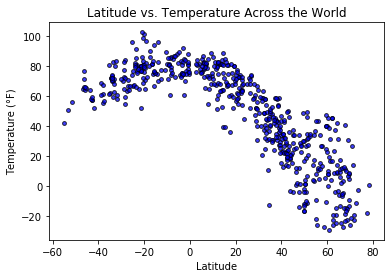

The plot above is analyzing the maximum temperature of each country based on its latitude. According to the plot above, the farther the location from the equator or zero degrees, the more extreme the temperatures are.


In [48]:
#Create a scatter plot of lattitude vs. temperature:

latitude = weather_df['Latitude']
temperature = weather_df['Temprature']
plt.scatter(latitude, temperature, marker="o", facecolors="blue", edgecolors="black",
            s=15, alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Temperature (°F)')
plt.title('Latitude vs. Temperature Across the World')
plt.savefig("LatVsTemp.png")
plt.show()

print('The plot above is analyzing the maximum temperature of each country based on its latitude. According to the plot above, the farther the location from the equator or zero degrees, the more extreme the temperatures are.')

#### Latitude vs. Humidity Plot

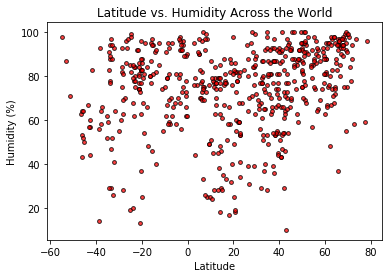

The plot above is analyzing the average humidity of each country based on its latitude. There does not appear to be a pattern between lattitude and humidity.


In [57]:
#Create a scatter plot of lattitude vs. humidity:

humidity = weather_df['Humidity']
plt.scatter(latitude, humidity, marker="o", facecolors="red", edgecolors="black",
            s=15, alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Humidity Across the World')
plt.savefig("LatVsHumidity.png")
plt.show()

print('The plot above is analyzing the average humidity of each country based on its latitude. There does not appear to be a pattern between lattitude and humidity.')

#### Latitude vs. Cloudiness Plot

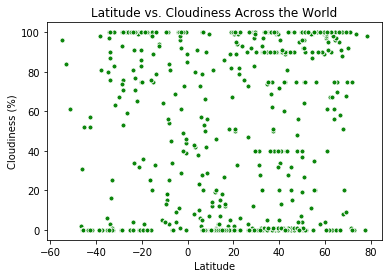

The plot above is analyzing the average cloudiness of each country based on its latitude. There does not appear to be a pattern between lattitude and cloudiness.


In [54]:
#Create a scatter plot of lattitude vs. cloudiness:

cloudiness = weather_df['Cloudiness']
plt.scatter(latitude, cloudiness, marker="o", facecolors="g", edgecolors="white",
            s=25, alpha=0.95)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs. Cloudiness Across the World')
plt.savefig("LatVsCloudiness.png")
plt.show()

print('The plot above is analyzing the average cloudiness of each country based on its latitude. There does not appear to be a pattern between lattitude and cloudiness.')

#### Latitude vs. Wind Speed Plot

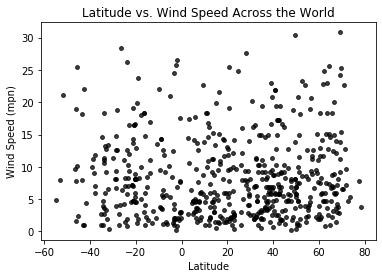

The plot above is analyzing the average wind speed of each country based on its latitude. There does not appear to be a pattern between lattitude and wind speed.


In [52]:
#Create a scatter plot of lattitude vs. wind speed:

wind_speed = weather_df['Wind Speed']
plt.scatter(latitude, wind_speed, marker="o", facecolors="black",
            s=15, alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mpn)')
plt.title('Latitude vs. Wind Speed Across the World')
plt.savefig("LatVsWind.png")
plt.show()

print('The plot above is analyzing the average wind speed of each country based on its latitude. There does not appear to be a pattern between lattitude and wind speed.')

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [61]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_df = weather_df.loc[weather_df['Latitude'] >= 0.0]
northern_hemisphere_df

southern_hemisphere_df = weather_df.loc[weather_df['Latitude'] < 0.0]
southern_hemisphere_df

City Name  Latitude  Longitude  Temprature  Humidity  Cloudiness  \
1             Ushuaia    -54.80     -68.30       41.90        98          96   
2      Port Elizabeth    -33.92      25.57       73.40        94          90   
5        Port Lincoln    -34.73     135.87       62.29        59          80   
6            Hermanus    -34.42      19.23       71.89        91         100   
11   Puerto Leguizamo     -0.19     -74.78       74.86        90          89   
..                ...       ...        ...         ...       ...         ...   
556              Poum    -20.23     164.02       79.45        77         100   
560            Manaus     -3.10     -60.02       75.02        94         100   
563       Capinopolis    -18.68     -49.57       72.70        95         100   
565         Caravelas    -17.71     -39.25       80.11        84           0   
566     Alice Springs    -23.70     133.88       91.36        20           0   

     Max Temp  Wind Speed  
1       41.90        4.92  
2       73.40       11.41  
5       62.29       14.58  
6       73.00        1.01  
11      74.86        3.04  
..        ...         ...  
556     79.45       16.69  
560     75.02        3.53  
563     72.70        8.30  
565     80.11       18.01  
566     91.36       12.59  

[169 rows x 8 columns]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

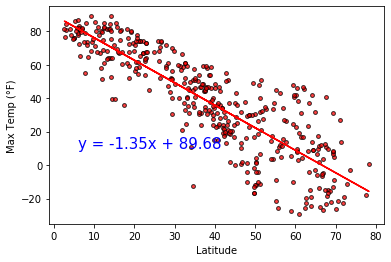

In [76]:
#Complete Max Temp vs. Latitude Linear Regression for Northern Hemisphere
latitude = northern_hemisphere_df['Latitude']
max_temp = northern_hemisphere_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, max_temp)

regress_values = latitude * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude,max_temp, marker="o", facecolors="red", edgecolors="black",
            s=15, alpha=0.75)
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (°F)')
plt.savefig('NorthernHemMaxTemp.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression